### 1880년 부터 2014년까지의 미국의 아기 이름을 정리해놓은 데이터셋

In [1]:
# 원래 name, gender, year가 factor로 되어있었는데 name, year는 factor로 있을 필요가 없어서 
# stringsAsFactors = F를 써준다
baby <- read.csv("../Data/R_Baby_Names_1880-2014.csv", stringsAsFactors = F)
head(baby)

Name,Gender,Count,Year,Year.Rank
Mary,F,7065,01/01/1880 12:00:00 AM,1
Anna,F,2604,01/01/1880 12:00:00 AM,2
Emma,F,2003,01/01/1880 12:00:00 AM,3
Elizabeth,F,1939,01/01/1880 12:00:00 AM,4
Minnie,F,1746,01/01/1880 12:00:00 AM,5
Margaret,F,1578,01/01/1880 12:00:00 AM,6


In [2]:
tail(baby)

,Name,Gender,Count,Year,Year.Rank
1825383,Zyel,M,5,01/01/2014 12:00:00 AM,13972
1825384,Zykeem,M,5,01/01/2014 12:00:00 AM,13973
1825385,Zymeer,M,5,01/01/2014 12:00:00 AM,13974
1825386,Zymiere,M,5,01/01/2014 12:00:00 AM,13975
1825387,Zyran,M,5,01/01/2014 12:00:00 AM,13976
1825388,Zyrin,M,5,01/01/2014 12:00:00 AM,13977


In [3]:
str(baby)

'data.frame':	1825388 obs. of  5 variables:
 $ Name     : chr  "Mary" "Anna" "Emma" "Elizabeth" ...
 $ Gender   : chr  "F" "F" "F" "F" ...
 $ Count    : int  7065 2604 2003 1939 1746 1578 1472 1414 1320 1288 ...
 $ Year     : chr  "01/01/1880 12:00:00 AM" "01/01/1880 12:00:00 AM" "01/01/1880 12:00:00 AM" "01/01/1880 12:00:00 AM" ...
 $ Year.Rank: int  1 2 3 4 5 6 7 8 9 10 ...


In [4]:
# Gender는 factor이어야 하니까 바꿔준다
baby$Gender <- as.factor(baby$Gender)

In [5]:
str(baby)

'data.frame':	1825388 obs. of  5 variables:
 $ Name     : chr  "Mary" "Anna" "Emma" "Elizabeth" ...
 $ Gender   : Factor w/ 2 levels "F","M": 1 1 1 1 1 1 1 1 1 1 ...
 $ Count    : int  7065 2604 2003 1939 1746 1578 1472 1414 1320 1288 ...
 $ Year     : chr  "01/01/1880 12:00:00 AM" "01/01/1880 12:00:00 AM" "01/01/1880 12:00:00 AM" "01/01/1880 12:00:00 AM" ...
 $ Year.Rank: int  1 2 3 4 5 6 7 8 9 10 ...


In [6]:
# baby의 year부분 정리하기(년도만 추출하기)
baby[,4] <- substring(baby[,4],7,10)

In [7]:
head(baby)

Name,Gender,Count,Year,Year.Rank
Mary,F,7065,1880,1
Anna,F,2604,1880,2
Emma,F,2003,1880,3
Elizabeth,F,1939,1880,4
Minnie,F,1746,1880,5
Margaret,F,1578,1880,6


In [9]:
# 저장하기
write.csv(baby, "../Data/baby.csv", row.names=F)

In [10]:
summary(baby) # 별로 볼건 없음

     Name           Gender          Count             Year          
 Length:1825388     F:1081660   Min.   :    5.0   Length:1825388    
 Class :character   M: 743728   1st Qu.:    7.0   Class :character  
 Mode  :character               Median :   12.0   Mode  :character  
                                Mean   :  184.7                     
                                3rd Qu.:   32.0                     
                                Max.   :99680.0                     
   Year.Rank    
 Min.   :    1  
 1st Qu.: 1790  
 Median : 4009  
 Mean   : 5301  
 3rd Qu.: 7820  
 Max.   :20548  

In [15]:
# baby에서 여자 아이만 Female 이라는 dataset를 만들고 row수 구하기
Female <- subset(baby,Gender == "F")
nrow(Female)

[1] 1081660

In [17]:
# 여자 아이 이름 중 중복 제거 하고 갯수 구하기
length(unique(Female$Name))

[1] 64911

In [19]:
# 유일한 여자 아이 이름 20개만 출력하기
sample(unique(Female$Name),20)

[1] "Antanea"   "Tansha"    "Elithia"   "Crissey"   "Dinasia"   "Zory"     
 [7] "Chantee"   "Marlane"   "Juaria"    "Timmi"     "Jhosselyn" "Joshanae" 
[13] "Vaelyn"    "Lolisa"    "Kylise"    "Jaydenn"   "Ryder"     "Amareya"  
[19] "Neeti"     "Kiele"

---
### 가장 많이 사용된 여자 아이 이름 10개 보여주기

In [21]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [30]:
femaleName <- arrange(aggregate(Count~Name, Female, sum), desc(Count))

In [31]:
femaleName[1:10,]

Name,Count
Mary,4115282
Elizabeth,1601128
Patricia,1570567
Jennifer,1462742
Linda,1450843
Barbara,1432944
Margaret,1240006
Susan,1120469
Dorothy,1105680
Sarah,1060643


In [32]:
# baby에서 남자아이만 Male이라는 데이터셋을 만들고 row수 구하기
Male <- subset(baby, Gender == "M")
nrow(Male)

[1] 743728

In [35]:
length(unique(Male$Name))

[1] 39199

In [59]:
Female_population <- aggregate(Count ~ Year, Female, sum)
Male_population <- aggregate(Count ~ Year, Male, sum)

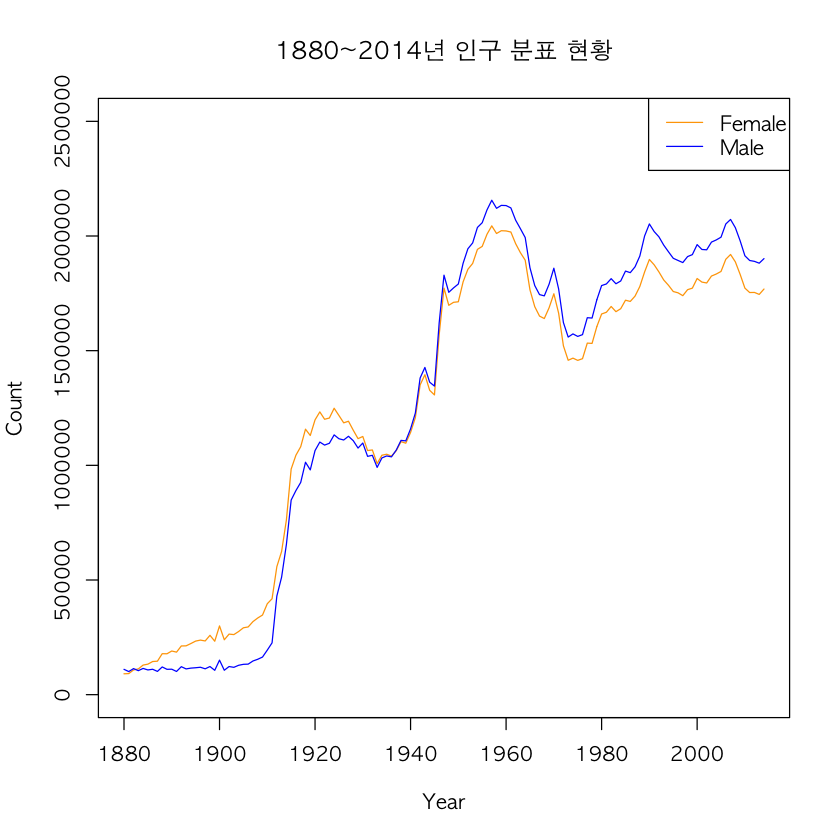

In [60]:
# Female, male의 연도별 합계를 구해서 그래프를 그려라
par(family = "AppleGothic")
options(warn = -1)
plot(Female_population,
     type="l",
     ylim=c(0,2500000),
     col="orange",
     main = "1880~2014년 인구 분표 현황"
    )
lines(Male_population,
      col="blue"
     )
legend("topright",# 1980, 1000000
       c("Female", "Male"),
       col=c("orange","blue"),
       lty=c(1,1)
      )

# 여기는 그냥 내가 해본 거

In [65]:
test <- merge(x=Female_population, y=Male_population, by.x="Year", by.y="Year")

In [70]:
test$차이 <- (test$Count.x - test$Count.y)